In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
# Downloading and making the model usable
mp_holistic = mp.solutions.holistic 

# To draw the keypoints on the face and keep track of it
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # Color convertion BGR to RGB
    image.flags.writeable = False                 # Image is no longer writable
    results = model.process(image)                # Making Prediction using the image captured by the camera
    image.flags.writeable = True                  # Makes the image writable again
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) # Color convertion RGB to BGR
    return image,results

In [5]:
cv2.cvtColor??

Docstring:
cvtColor(src, code[, dst[, dstCn]]) -> dst
.   @brief Converts an image from one color space to another.
.   
.   The function converts an input image from one color space to another. In case of a transformation
.   to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note
.   that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the
.   bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue
.   component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and
.   sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.
.   
.   The conventional ranges for R, G, and B channel values are:
.   -   0 to 255 for CV_8U images
.   -   0 to 65535 for CV_16U images
.   -   0 to 1 for CV_32F images
.   
.   In case of linear transformations, the range does not matter. But in case of a non-linear
.   transfo

In [4]:
def draw_landmarks(image,results):
     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image,results):
    # Draw face connections
     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                               mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                               mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                               ) 
     # Draw pose connections
     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                               )
     # Draw left hand connections
     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                               )
     # Draw right hand connections
     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                               ) 

In [6]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [9]:
mp_drawing.draw_landmarks??

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec], NoneType] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Optional[
        Union[DrawingSpec, Mapping[int, DrawingSpec]]
    ] = DrawingSpec(color=RED_

In [13]:
# to capture and use the webcam
cap=cv2.VideoCapture(0)
# detection confi is the initial detection like where the the detection starts 
# and tracking is to make sure how the trace goes from the main line and further where can be changed accoringly to achive the sutable model 
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        # Read feed
        ret,frame=cap.read()
        if not ret:
            break
        
        # Make detections
        image, results=mediapipe_detection(frame,holistic)
        print(results)
        
        
        # Draw Landmarks
        draw_styled_landmarks(image,results)
        
        # Show to screen
        cv2.imshow('my webcam',image)
        
        # breaking the frames
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [14]:
len(results.left_hand_landmarks.landmark)

21

In [15]:
draw_styled_landmarks(frame,results)

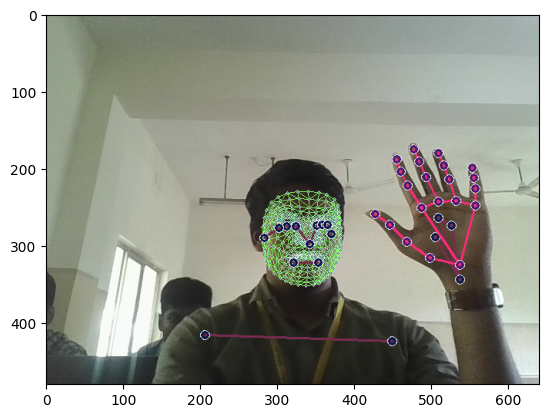

In [16]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# Extracting the key points


In [11]:
results.pose_landmarks

landmark {
  x: 0.551005483
  y: 0.594873548
  z: -0.71096766
  visibility: 0.999927938
}
landmark {
  x: 0.563241601
  y: 0.545016229
  z: -0.663671851
  visibility: 0.999838233
}
landmark {
  x: 0.573825121
  y: 0.546247303
  z: -0.663537681
  visibility: 0.999796808
}
landmark {
  x: 0.582679152
  y: 0.547872
  z: -0.663752198
  visibility: 0.999830604
}
landmark {
  x: 0.525516629
  y: 0.542502165
  z: -0.662286162
  visibility: 0.999832451
}
landmark {
  x: 0.509895205
  y: 0.542726755
  z: -0.661713719
  visibility: 0.999804616
}
landmark {
  x: 0.493637174
  y: 0.54482466
  z: -0.661790133
  visibility: 0.999859869
}
landmark {
  x: 0.597250104
  y: 0.577516615
  z: -0.340348184
  visibility: 0.999818265
}
landmark {
  x: 0.46637851
  y: 0.572869658
  z: -0.310040265
  visibility: 0.999837697
}
landmark {
  x: 0.568405509
  y: 0.651731551
  z: -0.587383509
  visibility: 0.999915183
}
landmark {
  x: 0.521610439
  y: 0.651644945
  z: -0.582161605
  visibility: 0.999903679
}
landm

In [17]:
results.left_hand_landmarks.landmark

[x: 0.840104043
y: 0.679042339
z: 2.55385487e-007
, x: 0.779548
y: 0.660366774
z: -0.0184436888
, x: 0.731272161
y: 0.616123438
z: -0.0236096941
, x: 0.697298288
y: 0.570581555
z: -0.0279306676
, x: 0.668016613
y: 0.540223479
z: -0.0308445208
, x: 0.76197511
y: 0.524050474
z: 0.00223346101
, x: 0.733816862
y: 0.463117838
z: -0.00629298203
, x: 0.72016573
y: 0.426890075
z: -0.0161562171
, x: 0.71110642
y: 0.393385381
z: -0.0237289686
, x: 0.795922935
y: 0.507717192
z: 0.00221457961
, x: 0.771797776
y: 0.44152686
z: -0.00102028006
, x: 0.757394493
y: 0.398773491
z: -0.00877747498
, x: 0.74614054
y: 0.364727557
z: -0.0151004838
, x: 0.832716048
y: 0.506206691
z: -0.0019020146
, x: 0.817780375
y: 0.447704822
z: -0.00766599
, x: 0.806372225
y: 0.409002125
z: -0.0130153513
, x: 0.79575026
y: 0.377053261
z: -0.0169738382
, x: 0.871705592
y: 0.517203033
z: -0.00847846922
, x: 0.871874571
y: 0.471090525
z: -0.0130742015
, x: 0.868312716
y: 0.442295372
z: -0.0136347152
, x: 0.864351511
y: 0.4165

# Extract key points

In [14]:
results.pose_landmarks.landmark[0].visibility

0.9999210834503174

# Pose


In [15]:
len(results.pose_landmarks.landmark)

33

In [16]:
landmarks_list = []

# Check if left hand landmarks are available
if results.pose_landmarks:
    # Iterate over each landmark
    for res in results.pose_landmarks.landmark:
        
        landmarks_list.append([res.x, res.y, res.z,res.visibility])
    
    # Convert the list to a NumPy array
    pose = np.array(landmarks_list).flatten()
else:
    # If no landmarks are available, create a zero-filled array
    pose = np.zeros(33*4)

In [17]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

In [ ]:
# pose=np.zeros(132)
# pose.shape

(132,)

In [21]:
pose.shape


(132,)

# Left hand


In [22]:
len(results.left_hand_landmarks.landmark)

21

In [23]:

landmarks_list = []

# Check if left hand landmarks are available
if results.left_hand_landmarks:
    # Iterate over each landmark
    for res in results.left_hand_landmarks.landmark:
        
        landmarks_list.append([res.x, res.y, res.z])
    
    # Convert the list to a NumPy array
    lh = np.array(landmarks_list).flatten()
else:
    # If no landmarks are available, create a zero-filled array
    lh = np.zeros(21 * 3)

In [17]:
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten()if results.left_hand_landmarks else np.zeros(21*3)

In [18]:
lh.shape

(63,)

# Right hand

* same as left hand 
left=right

In [ ]:

landmarks_list = []

# Check if left hand landmarks are available
if results.left_hand_landmarks:
    # Iterate over each landmark
    for res in results.left_hand_landmarks.landmark:
        
        landmarks_list.append([res.x, res.y, res.z])
    
    # Convert the list to a NumPy array
    rh = np.array(landmarks_list).flatten()
else:
    # If no landmarks are available, create a zero-filled array
    rh = np.zeros(21 * 3)

In [ ]:
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
rh.shape

(63,)

* Even if the left or right hand is not shown in the camera the program should not throw a error so to handle that we are going to create a blank array with zeros to avoid error 

# Face

In [ ]:
len(results.face_landmarks.landmark)


468

In [ ]:

landmarks_list = []

# Check if left hand landmarks are available
if results.face_landmarks:
    # Iterate over each landmark
    for res in results.face_landmarks.landmark:
        
        landmarks_list.append([res.x, res.y, res.z])
    
    # Convert the list to a NumPy array
    face = np.array(landmarks_list).flatten()
else:
    # If no landmarks are available, create a zero-filled array
    face = np.zeros(468*3)

In [ ]:
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [ ]:
face

array([ 0.44881889,  0.52925384, -0.02093188, ...,  0.50689662,
        0.42467257,  0.01041348])

# Converting the key point into a function one

In [18]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten()if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose,face,lh,rh])

In [19]:
result_test=extract_keypoints(results)

In [20]:
np.save('0',result_test)

In [21]:
np.load('0.npy')

array([ 0.53545058,  0.62165892, -0.76653606, ...,  0.        ,
        0.        ,  0.        ])

# 4.Setup Folders for Collection

In [22]:
#Path for exported data,numpy arrays
DATA_PATH=os.path.join('MP_Data')


#Actions that we try to detect
actions = np.array(['hello','thanks','iloveyou'])

#Thirty videos worth of data
no_sequences=30

#Videos are to be 30 flames in length
sequence_length=30

In [23]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

# 5.Collect Keypoint values for Training and Testing

In [37]:
# to capture and use the webcam
cap=cv2.VideoCapture(0)
# detection confi is the initial detection like where the the detection starts 
# and tracking is to make sure how the trace goes from the main line and further where can be changed accoringly to achive the sutable model 
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through the sequence
        for sequence in range(no_sequences):
            # Loop through the sequence length
            for frame_num in range(sequence_length):
        
                # Read feed
                ret,frame=cap.read()
                if not ret:
                    break
                
                # Make detections
                image, results=mediapipe_detection(frame,holistic)
                print(results)
                
                
                # Draw Landmarks
                draw_styled_landmarks(image,results)
                 
                # Apply logic so we are to collect the imagess    if not it will be really fast
                if frame_num == 0:
                    cv2.putText(image,'STARTING COLLECTION',(120,200),
                                cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)#(font,size,color,linewidth,linetype)
                    cv2.putText(image,'Collecting Frames for {} video Number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(1800)
                else:
                    cv2.putText(image,'Collecting Frames for {} video Number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA) 
                
                # new export keypoints
                keypoints=extract_keypoints(results)
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                
                # Show to screen
                cv2.imshow('my webcam',image)
                        
                # breaking the frames
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
        
cap.release()
cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [24]:
cap.release()
cv2.destroyAllWindows()

# 6.Preproess Data and Create Labels and Features

In [25]:
from sklearn.model_selection import train_test_split #helps us to differentate , train and test the model
from tensorflow.keras.utils import to_categorical    #

In [26]:
label_map={label:num for num,label in enumerate(actions)}

In [27]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [28]:
sequences,label=[],[]
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        label.append(label_map[action])

* it goes through all the 30 frames and add it to the windows 

In [37]:
np.array(sequences).shape

(90, 30, 1662)

In [31]:
np.array(label).shape

(90,)

In [40]:
x=np.array(sequences)

In [41]:
x.shape

(90, 30, 1662)

In [34]:
y=to_categorical(label).astype(int)


In [35]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05) 

In [43]:
y_test.shape

(5, 3)

# 7.Build and Train LSTM Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
